## About the Dataset
This dataset contains information about the credit landscape (credit loan provided to customers) of a large Singapore bank.
### Goal
The goal of this dataset is to predict whether the customer will default or not in the credit payment (credit loan payment).
### Features
The dataset includes the following features:
1. **checking_balance:** The amount of balance in SGD present in the current loan account /loan bank account of the customer who has taken the credit loan.
2. **months_loan_duration:** The duration of the loan in months, which ranges from 4 months to 6 years.
3. **credit_history:** The current credit history of the customer, ranging from critical to perfect (5 different values).
4. **purpose:** The purpose for which the loan was taken.
5. **amount:** The amount for which the credit loan was taken.
6. **savings_balance:** The amount of balance in SGD present in the savings bank account of the customer who has taken the credit loan.
7. **employment_duration:** The duration in years for which the customer has been in employment anywhere.
8. **percent_of_income:** This shows what % of the annual income of the customer is this loan amount.
9. **years_at_residence:** The number of years the customer has stayed in this location.
10. **age:** The age of the customer who has taken the credit loan.
11. **other_credit:** Any other credit that the customer has, apart from this credit loan.
12. **housing:** The type of residence that the customer possesses.
13. **existing_loans_count:** The total number of active loans that the customer has.
14. **job:** The type of job that the customer does.
15. **dependents:** The number of dependent family members for the customer.
16. **phone:** Does the customer have a phone or has updated the same in the records. "Yes" means he has a phone and has updated the same with the bank. "No" could mean either the customer does not have a phone, or he is yet to update the same with the bank.
### Target Variable
The target variable in this dataset is labeled as **default**. The values "no" and "yes" refer to whether someone will default or not in the credit card payment.

``The Model should have high Recall value because if a person is actually a default and model predicted him as not default then bank may suffer from finincial loss. So, the False negative is the most dangerous case for our model``
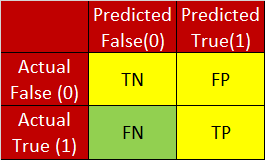

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
import xgboost as xgb

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [10]:
from tqdm import tqdm_notebook

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import joblib

## Importing and Reading Data

In [13]:
df = pd.read_csv('Raw_Data_Singapore Credit Dataset.csv')

In [14]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## EDA

### Checking for unique values for each feature

In [16]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [17]:
def unique_values(df,columns):
    return np.unique(df[columns])

In [18]:
count = 0
for i in df.columns:
    if df[i].dtypes == 'O':
        print('Feature:-',i,':')
        print(unique_values(df,i))
        count +=1
print('Number of Categorical features:',count)

Feature:- checking_balance :
['1 - 200 SGD' '< 0 SGD' '> 200 SGD' 'unknown']
Feature:- credit_history :
['critical' 'good' 'perfect' 'poor' 'very good']
Feature:- purpose :
['business' 'car' 'car0' 'education' 'furniture/appliances' 'renovations']
Feature:- savings_balance :
['100 - 500 SGD' '500 - 1000 SGD' '< 100 SGD' '> 1000 SGD' 'unknown']
Feature:- employment_duration :
['1 - 4 years' '4 - 7 years' '< 1 year' '> 7 years' 'unemployed']
Feature:- other_credit :
['bank' 'none' 'store']
Feature:- housing :
['other' 'own' 'rent']
Feature:- job :
['management' 'skilled' 'unemployed' 'unskilled']
Feature:- phone :
['no' 'yes']
Feature:- default :
['no' 'yes']
Number of Categorical features: 10


In [19]:
count = 0
for i in df.columns:
    if df[i].dtypes == 'int64':
        print('Feature:-',i,':')
        print(unique_values(df,i))
        count +=1
print('Number of Numerical features:',count)

Feature:- months_loan_duration :
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 26 27 28 30 33 36
 39 40 42 45 47 48 54 60 72]
Feature:- amount :
[  250   276   338   339   343   362   368   385   392   409   426   428
   433   448   454   458   484   518   522   571   585   590   601   609
   618   625   626   629   639   640   652   654   660   662   666   672
   674   682   683   684   685   691   697   700   701   707   708   709
   717   719   727   730   731   741   745   750   753   754   759   760
   763   766   776   781   783   790   795   797   802   804   806   836
   841   846   860   866   874   882   884   886   888   894   900   902
   907   909   915   918   926   929   930   931   932   936   937   939
   947   950   951   958   959   960   975   976   983   996   999  1007
  1024  1028  1037  1038  1042  1047  1048  1049  1050  1053  1055  1056
  1068  1076  1082  1092  1098  1101  1103  1107  1108  1113  1123  1126
  1131  1136  1138  1149  1154  1155  1158 

#### Merging car0 and car with same value car 

In [20]:
df['purpose'] = np.where(df['purpose']=='car0','car',df['purpose'])

#### Replacing Binary Class with 0 and 1

In [21]:
df['phone'] = np.where(df['phone']=='no',0,df['phone'])
df['phone'] = np.where(df['phone']=='yes',1,df['phone'])

In [22]:
df['default'] = np.where(df['default']=='no',0,df['default'])
df['default'] = np.where(df['default']=='yes',1,df['default'])

In [23]:
df.sample(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
278,unknown,6,good,furniture/appliances,4611,< 100 SGD,< 1 year,1,4,32,none,own,1,skilled,1,0,1
754,unknown,12,poor,renovations,1555,> 1000 SGD,> 7 years,4,4,55,none,other,2,skilled,2,0,1
84,< 0 SGD,10,good,furniture/appliances,2315,< 100 SGD,> 7 years,3,4,52,none,own,1,unskilled,1,0,0
68,unknown,36,good,education,1819,< 100 SGD,1 - 4 years,4,4,37,store,other,1,skilled,1,1,1
888,unknown,36,critical,car,6614,< 100 SGD,> 7 years,4,4,34,none,own,2,management,1,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [25]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Checking for if dataset is balanced or not 

In [26]:
df.value_counts(df.default)

default
0    700
1    300
dtype: int64

Dataset is not balanced

### Univariate Analysis

#### Plotting distribution of each variable using histograms

In [27]:
def distribution(df,columns):
    sns.set(rc = {'figure.figsize':(4,4)})
    sns.histplot(df[columns], bins=50,kde=True)
    title = 'Distribution for '+str(columns)
    plt.show()

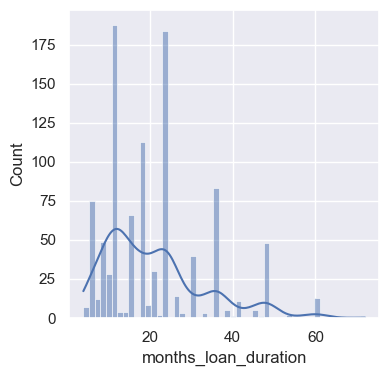

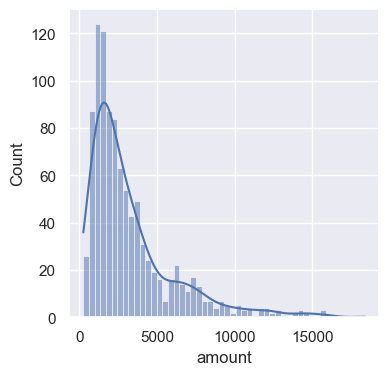

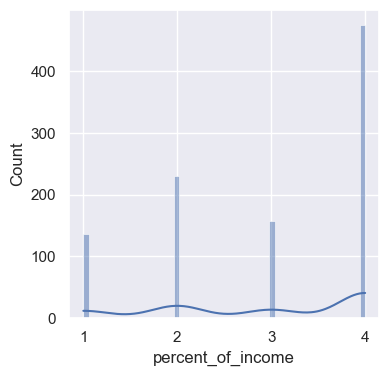

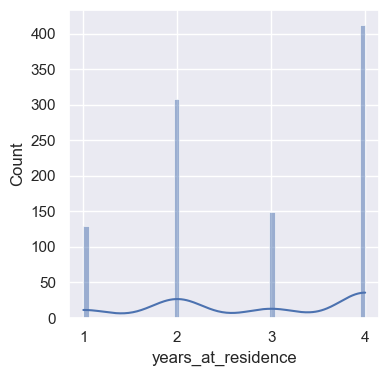

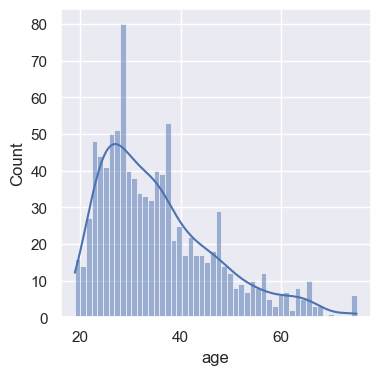

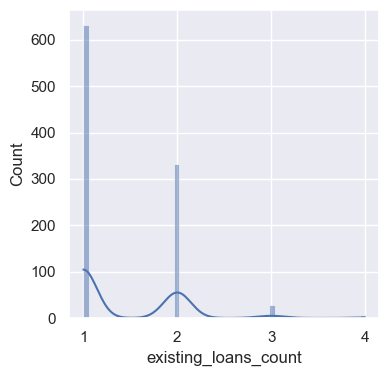

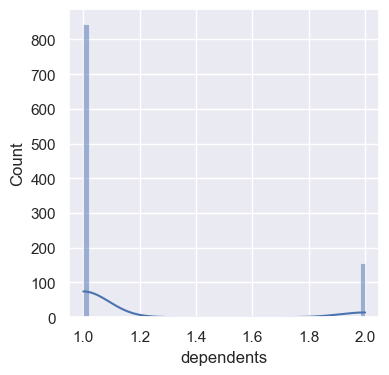

In [28]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        distribution(df,i)

#### For better understanding of outliers, Plotting boxplots

In [29]:
def boxplot(df,column):
    sns.boxplot(y=df[column])
    title = 'Box plot for '+str(column)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

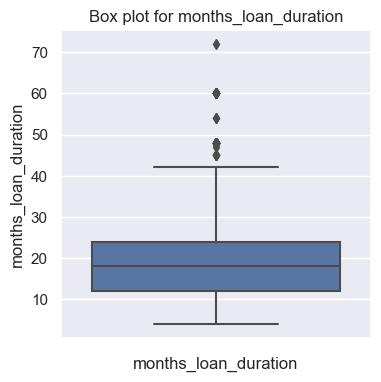

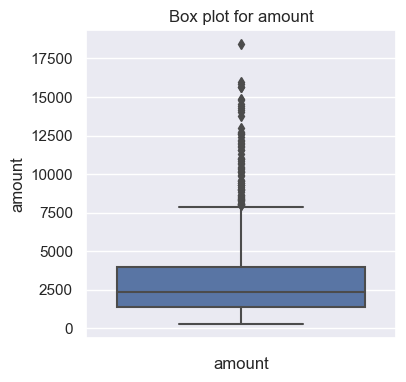

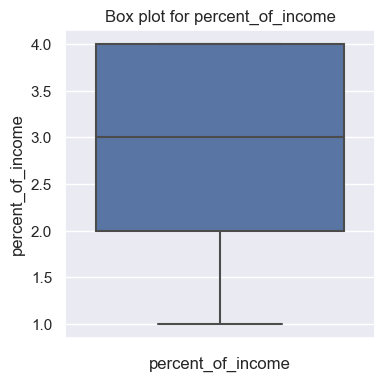

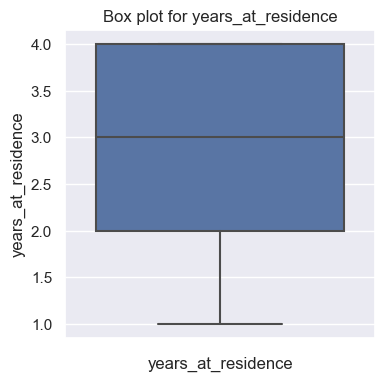

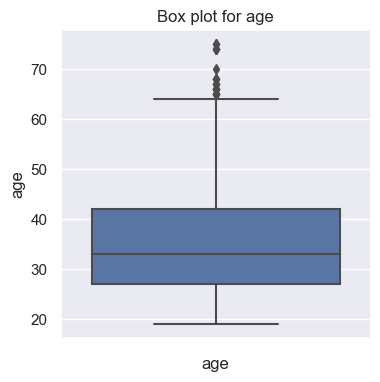

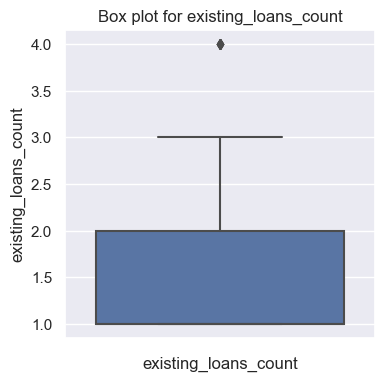

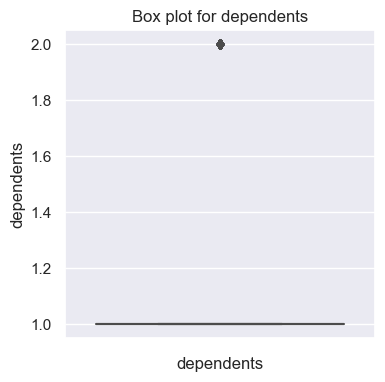

In [30]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        boxplot(df,i)

we can see, we are having multiple outliers in the various categories

### Custom Function to Remove Outliers

#### Identifying outliers

In [31]:
def outliers(data,z_thresold=3):
    outliers = []
    count = 0
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i - mean)/std
        if abs(z) > 3:
            outliers.append(i)
            count+=1
    print('Number of outliers:', count)
    return sorted(outliers) 

In [32]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        print('feature(',i,'):',outliers(df[i]),"\n")  

Number of outliers: 14
feature( months_loan_duration ): [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 72] 

Number of outliers: 25
feature( amount ): [11760, 11816, 11938, 11998, 12169, 12204, 12389, 12579, 12612, 12680, 12749, 12976, 13756, 14027, 14179, 14318, 14421, 14555, 14782, 14896, 15653, 15672, 15857, 15945, 18424] 

Number of outliers: 0
feature( percent_of_income ): [] 

Number of outliers: 0
feature( years_at_residence ): [] 

Number of outliers: 7
feature( age ): [70, 74, 74, 74, 74, 75, 75] 

Number of outliers: 6
feature( existing_loans_count ): [4, 4, 4, 4, 4, 4] 

Number of outliers: 0
feature( dependents ): [] 



Values of 4 in "existing_loans_count" can't be treat as outlier because values of 4 in the "existing_loans_count" feature are not due to data entry errors and they are consistent although their count is very low.

##### If we remove all the outliers then maximum data can be lost is:

In [33]:
TotalOutliers = 25+14+7+6
TotalOutliers

52

In [34]:
Percentage_lost = ((TotalOutliers)/len(df))*100
Percentage_lost

5.2

#### Removing Outliers

In [35]:
df = df[df['months_loan_duration']<60]
df = df[df['age']<70]

In [36]:
df['amount'] = np.where(df['amount']>=11760,np.mean(df['amount']),df['amount'])

In [37]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,20.395301,2948.722850,2.981614,2.837589,35.259448,1.409602,1.155260
std,11.148652,2208.741438,1.118568,1.102691,10.884977,0.578014,0.362338
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1359.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2284.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3654.000000,4.000000,4.000000,41.500000,2.000000,1.000000
max,54.000000,11590.000000,4.000000,4.000000,68.000000,4.000000,2.000000


### Bivariate Analysis

#### Analysing each Categorical Feature with target variable

In [38]:
def countplot(df,column):
    pd.crosstab(df[column],df['default']).plot(kind='bar')
    title = 'Purchase Frequency for '+str(column)+' Title'
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency of Purchase')
    plt.show()

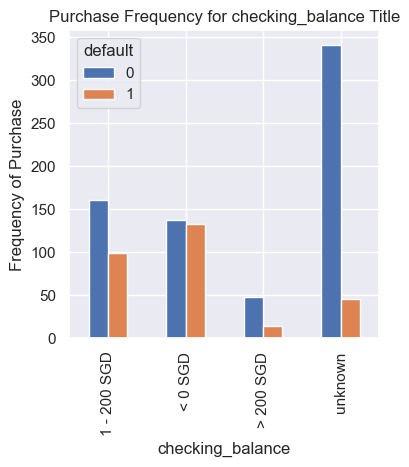

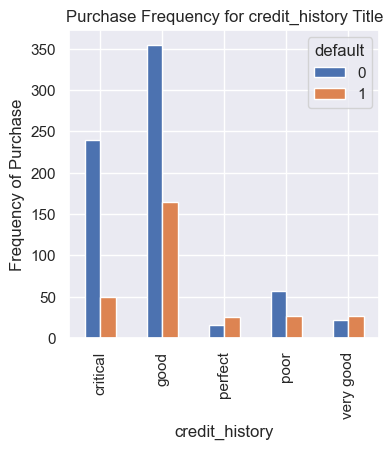

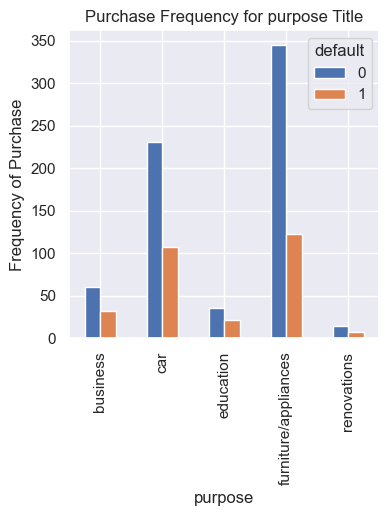

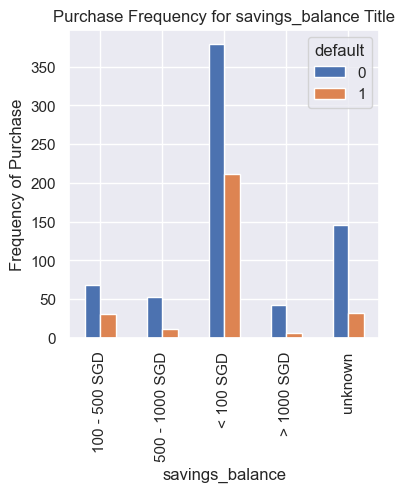

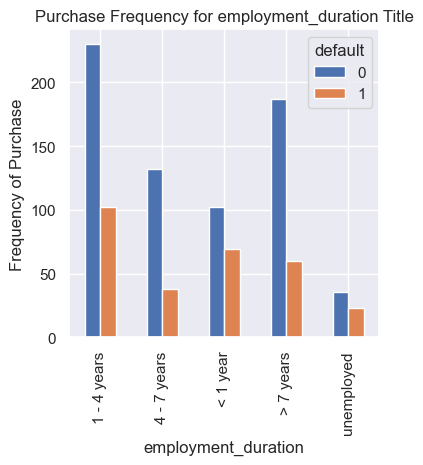

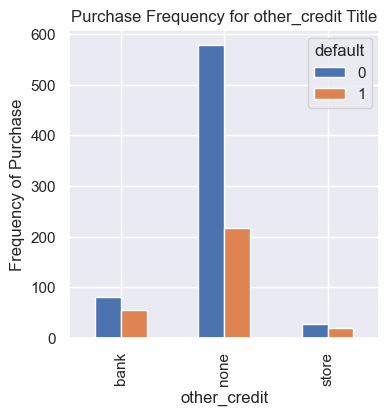

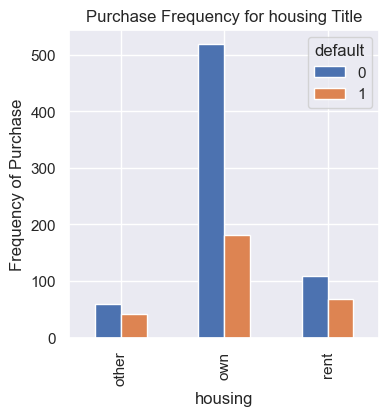

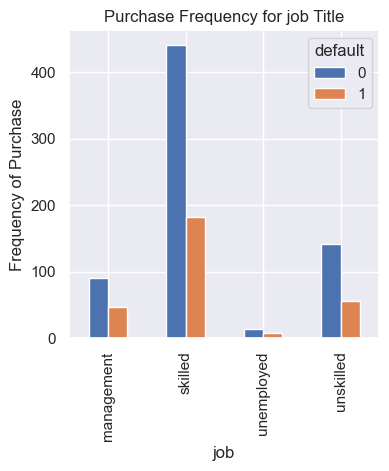

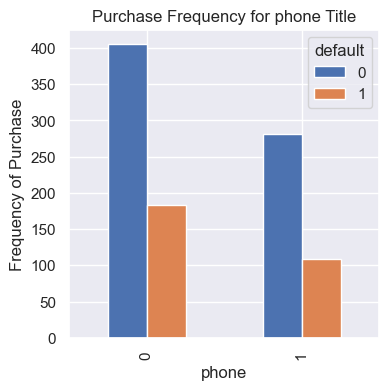

In [39]:
for i in df.columns:
    if df[i].dtypes == 'O' and i!='default':
        countplot(df,i)

We can see all features are having variations with target variable so all seems to be as important features

#### Checking Correlation

<Axes: >

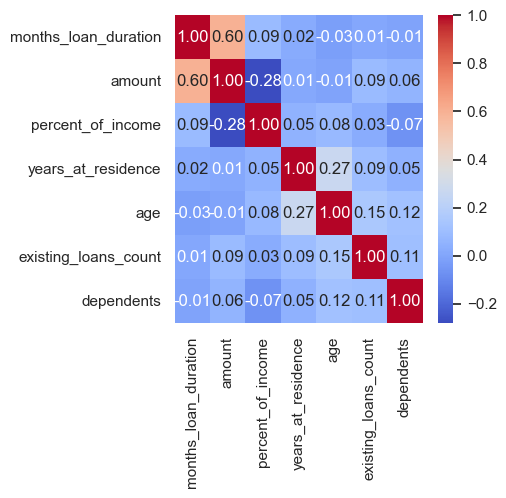

In [40]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt=".2f")

## Preparation of Data before Training the algorithm

### Creating Dummy Variable


In [41]:
catvars = [i for i in df.columns if df[i].dtype=='O'] 
catvars.remove('default')
df1 = df
for vars in catvars:
    dummy = pd.get_dummies(df[vars],prefix=vars,drop_first=True)
    df1 = pd.concat([df1,dummy],axis =1)

In [42]:
df.shape,df1.shape,len(catvars)

((979, 17), (979, 44), 9)

In [43]:
df1.sample(1)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_1
502,> 200 SGD,9,good,furniture/appliances,1126.0,100 - 500 SGD,> 7 years,2,4,49,none,own,1,skilled,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [44]:
df1 = df1.drop(catvars,axis=1)
df1.shape

(979, 35)

In [45]:
df1 = df1.reset_index(drop=True)

In [46]:
df1.sample()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_1
612,15,1979.0,4,2,35,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0


### Splitting Features and Target 

In [47]:
target = ['default']
target

['default']

In [48]:
features = list(df1.columns)
features.remove(target[0])
print(features,len(features))

['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'checking_balance_< 0 SGD', 'checking_balance_> 200 SGD', 'checking_balance_unknown', 'credit_history_good', 'credit_history_perfect', 'credit_history_poor', 'credit_history_very good', 'purpose_car', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'savings_balance_500 - 1000 SGD', 'savings_balance_< 100 SGD', 'savings_balance_> 1000 SGD', 'savings_balance_unknown', 'employment_duration_4 - 7 years', 'employment_duration_< 1 year', 'employment_duration_> 7 years', 'employment_duration_unemployed', 'other_credit_none', 'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled', 'job_unemployed', 'job_unskilled', 'phone_1'] 34


### Scaling features 

In [49]:
sc = StandardScaler()
sc_x = sc.fit_transform(df1[features])
sc_x = pd.DataFrame(sc_x)

In [50]:
sc_x.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
176,0.054267,-1.077056,0.910902,1.054697,2.733653,1.021948,-0.428715,1.620471,-0.260023,-0.808527,-1.062196,-0.206394,-0.306357,-0.224564,1.377116,-0.250948,-0.957001,-0.15162,-0.262254,0.810256,-0.227063,-0.471405,-0.458406,-0.460037,1.7215,-0.25324,0.477866,-0.224564,0.629743,-0.471405,0.755929,-0.148056,-0.503509,-0.815454


### Multi-collinearity Check

In [51]:
variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : features}
     
vif = pd.DataFrame(data)

In [52]:
vif

,VIF,Features
0,1.926669,months_loan_duration
1,2.155094,amount
2,1.340937,percent_of_income
3,1.315015,years_at_residence
4,1.401453,age
5,1.643171,existing_loans_count
6,1.107522,dependents
7,1.641370,checking_balance_< 0 SGD
8,1.210433,checking_balance_> 200 SGD
9,1.656936,checking_balance_unknown


In [53]:
x = sc_x.values
y = df[target].values

In [54]:
x.shape,y.shape

((979, 34), (979, 1))

## MODEL BUILDING

### Logistic Regression 

In [55]:
def logreg(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Logistic Regression'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = LogisticRegression()
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [56]:
logreg(0.3)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.758
Accuracy of logistic regression classifier on test set: 0.776
Predicted    0   1  All
Actual                 
0          186  20  206
1           46  42   88
All        232  62  294
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       206
           1       0.68      0.48      0.56        88

    accuracy                           0.78       294
   macro avg       0.74      0.69      0.70       294
weighted avg       0.76      0.78      0.76       294

AUC Score 0.7874558693733451


#### Split Size 0.25

In [57]:
logreg(0.25)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.766
Accuracy of logistic regression classifier on test set: 0.771
Predicted    0   1  All
Actual                 
0          152  20  172
1           36  37   73
All        188  57  245
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       172
           1       0.65      0.51      0.57        73

    accuracy                           0.77       245
   macro avg       0.73      0.70      0.71       245
weighted avg       0.76      0.77      0.76       245

AUC Score 0.7716629499840714


#### Split Size 0.2

In [58]:
logreg(0.2)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.760
Accuracy of logistic regression classifier on test set: 0.781
Predicted    0   1  All
Actual                 
0          122  16  138
1           27  31   58
All        149  47  196
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       138
           1       0.66      0.53      0.59        58

    accuracy                           0.78       196
   macro avg       0.74      0.71      0.72       196
weighted avg       0.77      0.78      0.77       196

AUC Score 0.7903548225887056


### Decision Tree

In [59]:
def dtree(SplitSize,samples_split=2,samples_leaf=1,max_depth=None):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = DecisionTreeClassifier(min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth)
    model.fit(xtrain, ytrain)
    print('Accuracy of Decision Tree classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [60]:
dtree(.3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 1.000
Accuracy of Decision Tree classifier on test set: 0.687
Predicted    0   1  All
Actual                 
0          161  45  206
1           47  41   88
All        208  86  294
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       206
           1       0.48      0.47      0.47        88

    accuracy                           0.69       294
   macro avg       0.63      0.62      0.62       294
weighted avg       0.69      0.69      0.69       294

AUC Score 0.6237312444836716


So we see model is overfitted

In [61]:
dtree(.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 0.832
Accuracy of Decision Tree classifier on test set: 0.752
Predicted    0   1  All
Actual                 
0          168  38  206
1           35  53   88
All        203  91  294
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       206
           1       0.58      0.60      0.59        88

    accuracy                           0.75       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.75      0.75      0.75       294

AUC Score 0.761694616063548


In [62]:
dtree(.3,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 0.752
Accuracy of Decision Tree classifier on test set: 0.738
Predicted    0   1  All
Actual                 
0          164  42  206
1           35  53   88
All        199  95  294
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       206
           1       0.56      0.60      0.58        88

    accuracy                           0.74       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.74      0.74      0.74       294

AUC Score 0.7545509708737864


#### Split Size 0.25

In [63]:
dtree(.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of Decision Tree classifier on train set: 0.835
Accuracy of Decision Tree classifier on test set: 0.686
Predicted    0   1  All
Actual                 
0          138  34  172
1           43  30   73
All        181  64  245
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       172
           1       0.47      0.41      0.44        73

    accuracy                           0.69       245
   macro avg       0.62      0.61      0.61       245
weighted avg       0.67      0.69      0.68       245

AUC Score 0.661237655304237


In [64]:
dtree(.25,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of Decision Tree classifier on train set: 0.752
Accuracy of Decision Tree classifier on test set: 0.682
Predicted    0   1  All
Actual                 
0          149  23  172
1           55  18   73
All        204  41  245
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       172
           1       0.44      0.25      0.32        73

    accuracy                           0.68       245
   macro avg       0.58      0.56      0.55       245
weighted avg       0.64      0.68      0.65       245

AUC Score 0.727899012424339


#### Split Size 0.2

In [65]:
dtree(.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of Decision Tree classifier on train set: 0.852
Accuracy of Decision Tree classifier on test set: 0.704
Predicted    0   1  All
Actual                 
0          110  28  138
1           30  28   58
All        140  56  196
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       138
           1       0.50      0.48      0.49        58

    accuracy                           0.70       196
   macro avg       0.64      0.64      0.64       196
weighted avg       0.70      0.70      0.70       196

AUC Score 0.7271989005497251


In [66]:
dtree(.2,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of Decision Tree classifier on train set: 0.759
Accuracy of Decision Tree classifier on test set: 0.714
Predicted    0   1  All
Actual                 
0          106  32  138
1           24  34   58
All        130  66  196
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       138
           1       0.52      0.59      0.55        58

    accuracy                           0.71       196
   macro avg       0.67      0.68      0.67       196
weighted avg       0.73      0.71      0.72       196

AUC Score 0.718328335832084


### Random Forest

In [67]:
def RF(SplitSize,n_estimators=1,samples_split=2,samples_leaf=1,max_depth=None,criterion='gini'):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Random Forest'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth,criterion=criterion)
    model.fit(xtrain, ytrain)
    print('Accuracy of Random Forest classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of Random Forest classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [68]:
RF(0.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.734
Accuracy of Random Forest classifier on test set: 0.667
Predicted    0   1  All
Actual                 
0          171  35  206
1           63  25   88
All        234  60  294
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       206
           1       0.42      0.28      0.34        88

    accuracy                           0.67       294
   macro avg       0.57      0.56      0.56       294
weighted avg       0.64      0.67      0.65       294

AUC Score 0.6716957193292146


In [69]:
RF(0.3,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.780
Accuracy of Random Forest classifier on test set: 0.728
Predicted    0   1  All
Actual                 
0          204   2  206
1           78  10   88
All        282  12  294
              precision    recall  f1-score   support

           0       0.72      0.99      0.84       206
           1       0.83      0.11      0.20        88

    accuracy                           0.73       294
   macro avg       0.78      0.55      0.52       294
weighted avg       0.76      0.73      0.65       294

AUC Score 0.7837047661076788


In [70]:
RF(0.3,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.752
Accuracy of Random Forest classifier on test set: 0.646
Predicted    0   1  All
Actual                 
0          169  37  206
1           67  21   88
All        236  58  294
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       206
           1       0.36      0.24      0.29        88

    accuracy                           0.65       294
   macro avg       0.54      0.53      0.53       294
weighted avg       0.61      0.65      0.62       294

AUC Score 0.6161738746690203


In [71]:
RF(0.3,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.780
Accuracy of Random Forest classifier on test set: 0.731
Predicted    0   1  All
Actual                 
0          205   1  206
1           78  10   88
All        283  11  294
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       206
           1       0.91      0.11      0.20        88

    accuracy                           0.73       294
   macro avg       0.82      0.55      0.52       294
weighted avg       0.78      0.73      0.65       294

AUC Score 0.7957303618711387


#### Split Size 0.25

In [72]:
RF(0.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.744
Accuracy of Random Forest classifier on test set: 0.686
Predicted    0   1  All
Actual                 
0          144  28  172
1           49  24   73
All        193  52  245
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       172
           1       0.46      0.33      0.38        73

    accuracy                           0.69       245
   macro avg       0.60      0.58      0.59       245
weighted avg       0.66      0.69      0.67       245

AUC Score 0.6276282255495381


In [73]:
RF(0.25,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.782
Accuracy of Random Forest classifier on test set: 0.735
Predicted    0   1  All
Actual                 
0          167   5  172
1           60  13   73
All        227  18  245
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       172
           1       0.72      0.18      0.29        73

    accuracy                           0.73       245
   macro avg       0.73      0.57      0.56       245
weighted avg       0.73      0.73      0.67       245

AUC Score 0.7852819369225869


In [74]:
RF(0.25,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.730
Accuracy of Random Forest classifier on test set: 0.694
Predicted    0   1  All
Actual                 
0          146  26  172
1           49  24   73
All        195  50  245
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       172
           1       0.48      0.33      0.39        73

    accuracy                           0.69       245
   macro avg       0.61      0.59      0.59       245
weighted avg       0.67      0.69      0.67       245

AUC Score 0.6917011787193373


In [75]:
RF(0.25,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.793
Accuracy of Random Forest classifier on test set: 0.735
Predicted    0   1  All
Actual                 
0          168   4  172
1           61  12   73
All        229  16  245
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       172
           1       0.75      0.16      0.27        73

    accuracy                           0.73       245
   macro avg       0.74      0.57      0.55       245
weighted avg       0.74      0.73      0.67       245

AUC Score 0.781459063395986


#### Split Size 0.2

In [76]:
RF(0.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.734
Accuracy of Random Forest classifier on test set: 0.714
Predicted    0   1  All
Actual                 
0          115  23  138
1           33  25   58
All        148  48  196
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       138
           1       0.52      0.43      0.47        58

    accuracy                           0.71       196
   macro avg       0.65      0.63      0.64       196
weighted avg       0.70      0.71      0.71       196

AUC Score 0.698088455772114


In [77]:
RF(0.2,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.782
Accuracy of Random Forest classifier on test set: 0.719
Predicted    0   1  All
Actual                 
0          133   5  138
1           50   8   58
All        183  13  196
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       138
           1       0.62      0.14      0.23        58

    accuracy                           0.72       196
   macro avg       0.67      0.55      0.53       196
weighted avg       0.69      0.72      0.65       196

AUC Score 0.7833583208395802


In [78]:
RF(0.2,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.732
Accuracy of Random Forest classifier on test set: 0.689
Predicted    0   1  All
Actual                 
0          123  15  138
1           46  12   58
All        169  27  196
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       138
           1       0.44      0.21      0.28        58

    accuracy                           0.69       196
   macro avg       0.59      0.55      0.54       196
weighted avg       0.64      0.69      0.65       196

AUC Score 0.6328085957021489


In [79]:
RF(0.2,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.774
Accuracy of Random Forest classifier on test set: 0.735
Predicted    0   1  All
Actual                 
0          134   4  138
1           48  10   58
All        182  14  196
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       138
           1       0.71      0.17      0.28        58

    accuracy                           0.73       196
   macro avg       0.73      0.57      0.56       196
weighted avg       0.73      0.73      0.67       196

AUC Score 0.7926036981509246


### XG Boost

#### Model Definition

In [80]:
def xgbst(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'XGB'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                                num_class=3, 
                                missing=1,
                                gamma=0, # default gamma value
                                learning_rate=0.1,
                                max_depth=5, # re-optimized from v2
                                reg_lambda=1, # default L2 value
                                #subsample=0.8, # tried but not ideal
                                #colsample_bytree=0.3, # tried but not ideal
                                early_stopping_rounds=10,
                                eval_metric=['merror','mlogloss'],
                                seed=42)
    xgb_clf.fit(xtrain, 
                ytrain,
                verbose=0, # set to 1 to see xgb training round intermediate results
                #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
                eval_set=[(xtrain, ytrain), (xtest, ytest)])

    # preparing evaluation metric plots
    results = xgb_clf.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # xgboost 'mlogloss' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    plt.ylabel('mlogloss')
    plt.title('GridSearchCV XGBoost mlogloss')
    plt.show()

    # xgboost 'merror' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('merror')
    plt.title('GridSearchCV XGBoost merror')
    plt.show()

    ypred = xgb_clf.predict(xtest)
    print('\n--------------- Classification Report ---------------\n')
    print('Accuracy of XG Boost classifier on train set: {:.3f}'.format(xgb_clf.score(xtrain, ytrain)))
    print('Accuracy of XG Boost classifier on test set: {:.3f}'.format(xgb_clf.score(xtest, ytest)))
    print(classification_report(ytest, ypred))

#### Split Size 0.3

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.3 ========================================


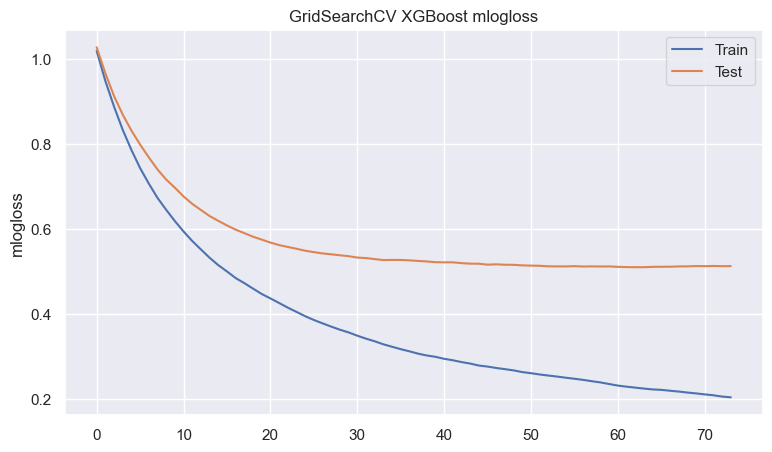

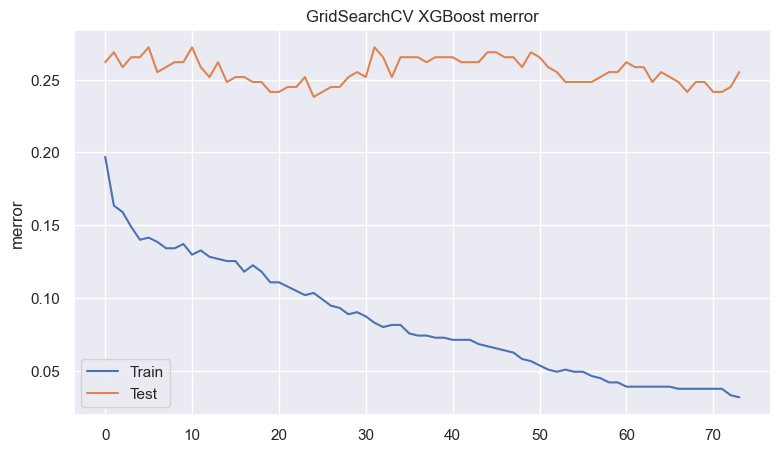


--------------- Classification Report ---------------

Accuracy of XG Boost classifier on train set: 0.961
Accuracy of XG Boost classifier on test set: 0.752
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       206
           1       0.61      0.47      0.53        88

    accuracy                           0.75       294
   macro avg       0.70      0.67      0.68       294
weighted avg       0.74      0.75      0.74       294



In [81]:
xgbst(0.3)

#### Split Size 0.25

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.25 ========================================


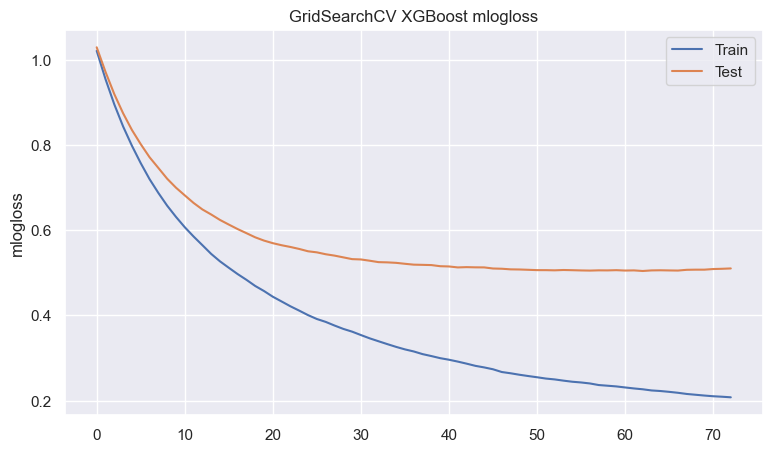

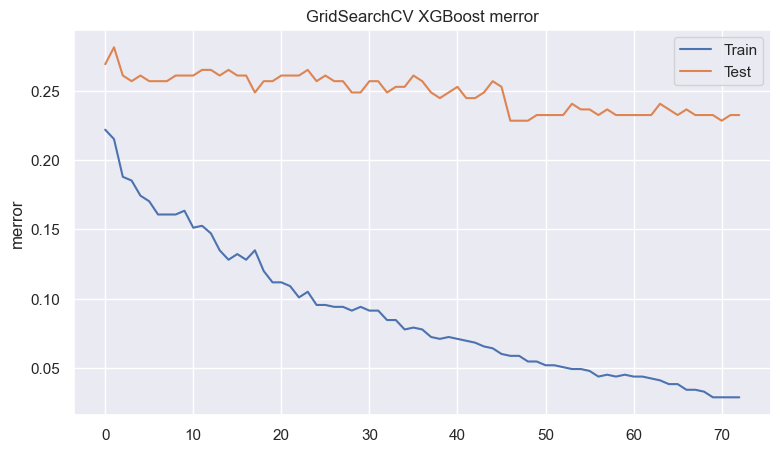


--------------- Classification Report ---------------

Accuracy of XG Boost classifier on train set: 0.958
Accuracy of XG Boost classifier on test set: 0.767
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       172
           1       0.62      0.56      0.59        73

    accuracy                           0.77       245
   macro avg       0.72      0.71      0.71       245
weighted avg       0.76      0.77      0.76       245



In [82]:
xgbst(0.25)

#### Split Size 0.2

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.2 ========================================


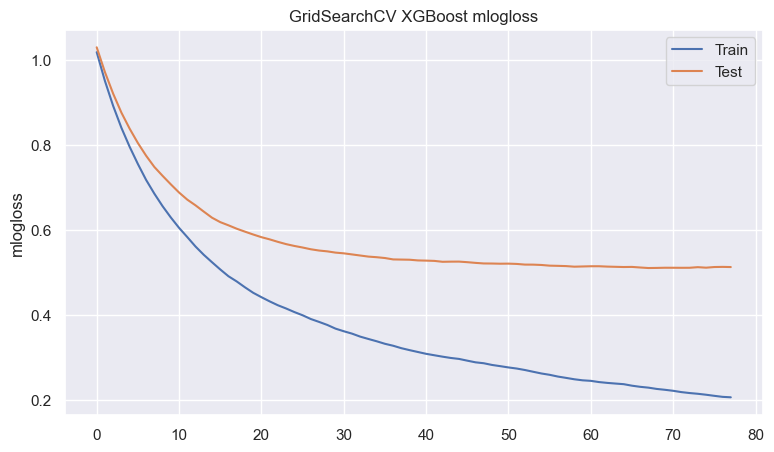

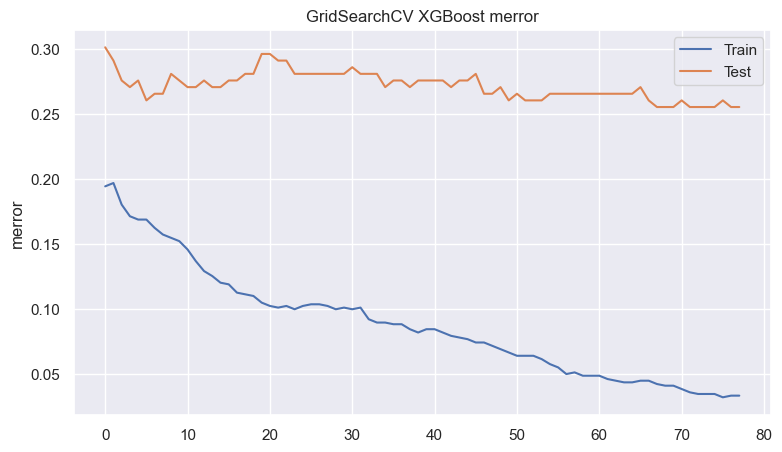


--------------- Classification Report ---------------

Accuracy of XG Boost classifier on train set: 0.958
Accuracy of XG Boost classifier on test set: 0.745
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       138
           1       0.58      0.50      0.54        58

    accuracy                           0.74       196
   macro avg       0.69      0.67      0.68       196
weighted avg       0.74      0.74      0.74       196



In [83]:
xgbst(0.2)

## SMOTE to balance dataset

### Applying SMOTE algorithm to balance dataset

In [84]:
pd.DataFrame(y).value_counts()

0    687
1    292
dtype: int64

In [85]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(sc_x, y.astype('int32'))

In [86]:
pd.DataFrame(y_sm).value_counts()

0    687
1    687
dtype: int64

In [87]:
x_sm.shape,y_sm.shape

((1374, 34), (1374,))

In [88]:
y_sm = y_sm.reshape(-1,1)
y_sm.shape

(1374, 1)

In [89]:
x_sm = x_sm.values

In [90]:
x_sm,y_sm[:5]

(array([[-1.29187442, -0.80617517,  0.91090235, ..., -0.1480563 ,
         -0.50350881,  1.22631004],
        [ 2.47732252,  1.35996528, -0.8780112 , ..., -0.1480563 ,
         -0.50350881, -0.81545447],
        [-0.75341772, -0.38626463, -0.8780112 , ..., -0.1480563 ,
          1.98606255, -0.81545447],
        ...,
        [ 0.36045272,  0.37439111, -0.24077927, ..., -0.1480563 ,
         -0.50350881, -0.81545447],
        [-0.45206388, -0.95830591,  0.91090235, ..., -0.1480563 ,
          0.19315062, -0.81545447],
        [-0.84134852, -0.1796285 , -0.57684897, ..., -0.1480563 ,
         -0.50350881,  1.22631004]]),
 array([[0],
        [1],
        [0],
        [0],
        [1]]))

In [91]:
x_sm.shape,y_sm.shape

((1374, 34), (1374, 1))

In [92]:
x.shape,y.shape

((979, 34), (979, 1))

### Logistic Regression 

In [93]:
def logreg(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm.astype('int64'),test_size=SplitSize,random_state=10)
    model = 'Logistic Regression'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = LogisticRegression()
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [94]:
logreg(0.3)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.777
Accuracy of logistic regression classifier on test set: 0.751
Predicted    0    1  All
Actual                  
0          137   58  195
1           45  173  218
All        182  231  413
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       195
           1       0.75      0.79      0.77       218

    accuracy                           0.75       413
   macro avg       0.75      0.75      0.75       413
weighted avg       0.75      0.75      0.75       413

AUC Score 0.8072453540343448


#### Split Size 0.25

In [95]:
logreg(0.25)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.773
Accuracy of logistic regression classifier on test set: 0.747
Predicted    0    1  All
Actual                  
0          114   47  161
1           40  143  183
All        154  190  344
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       161
           1       0.75      0.78      0.77       183

    accuracy                           0.75       344
   macro avg       0.75      0.74      0.75       344
weighted avg       0.75      0.75      0.75       344

AUC Score 0.800224009774972


#### Split Size 0.2

In [96]:
logreg(0.2)

<IPython.core.display.Javascript object>

======================================== Logistic Regression with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.769
Accuracy of logistic regression classifier on test set: 0.753
Predicted    0    1  All
Actual                  
0           91   38  129
1           30  116  146
All        121  154  275
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       129
           1       0.75      0.79      0.77       146

    accuracy                           0.75       275
   macro avg       0.75      0.75      0.75       275
weighted avg       0.75      0.75      0.75       275

AUC Score 0.800095571838165


### Decision Tree

In [97]:
def dtree(SplitSize,samples_split=2,samples_leaf=1,max_depth=None):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = DecisionTreeClassifier(min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth)
    model.fit(xtrain, ytrain)
    print('Accuracy of Decision Tree classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [98]:
dtree(.3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 1.000
Accuracy of Decision Tree classifier on test set: 0.731
Predicted    0    1  All
Actual                  
0          138   57  195
1           54  164  218
All        192  221  413
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       195
           1       0.74      0.75      0.75       218

    accuracy                           0.73       413
   macro avg       0.73      0.73      0.73       413
weighted avg       0.73      0.73      0.73       413

AUC Score 0.7299929428369794


So we see model is overfitted

In [99]:
dtree(.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 0.873
Accuracy of Decision Tree classifier on test set: 0.741
Predicted    0    1  All
Actual                  
0          149   46  195
1           61  157  218
All        210  203  413
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       195
           1       0.77      0.72      0.75       218

    accuracy                           0.74       413
   macro avg       0.74      0.74      0.74       413
weighted avg       0.74      0.74      0.74       413

AUC Score 0.803187485297577


In [100]:
dtree(.3,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of Decision Tree classifier on train set: 0.786
Accuracy of Decision Tree classifier on test set: 0.726
Predicted    0    1  All
Actual                  
0          145   50  195
1           63  155  218
All        208  205  413
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       195
           1       0.76      0.71      0.73       218

    accuracy                           0.73       413
   macro avg       0.73      0.73      0.73       413
weighted avg       0.73      0.73      0.73       413

AUC Score 0.7916490237591156


#### Split Size 0.25

In [101]:
dtree(.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of Decision Tree classifier on train set: 0.870
Accuracy of Decision Tree classifier on test set: 0.730
Predicted    0    1  All
Actual                  
0          124   37  161
1           56  127  183
All        180  164  344
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       161
           1       0.77      0.69      0.73       183

    accuracy                           0.73       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.73      0.73      0.73       344

AUC Score 0.8111869123986016


In [102]:
dtree(.25,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of Decision Tree classifier on train set: 0.773
Accuracy of Decision Tree classifier on test set: 0.744
Predicted    0    1  All
Actual                  
0          105   56  161
1           32  151  183
All        137  207  344
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       161
           1       0.73      0.83      0.77       183

    accuracy                           0.74       344
   macro avg       0.75      0.74      0.74       344
weighted avg       0.75      0.74      0.74       344

AUC Score 0.7942164749007229


#### Split Size 0.2

In [103]:
dtree(.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of Decision Tree classifier on train set: 0.867
Accuracy of Decision Tree classifier on test set: 0.745
Predicted    0    1  All
Actual                  
0          103   26  129
1           44  102  146
All        147  128  275
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       129
           1       0.80      0.70      0.74       146

    accuracy                           0.75       275
   macro avg       0.75      0.75      0.75       275
weighted avg       0.75      0.75      0.75       275

AUC Score 0.8128119358606776


In [104]:
dtree(.2,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of Decision Tree classifier on train set: 0.764
Accuracy of Decision Tree classifier on test set: 0.735
Predicted    0    1  All
Actual                  
0          104   25  129
1           48   98  146
All        152  123  275
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       129
           1       0.80      0.67      0.73       146

    accuracy                           0.73       275
   macro avg       0.74      0.74      0.73       275
weighted avg       0.74      0.73      0.73       275

AUC Score 0.8117500265477329


### Random Forest

In [105]:
def RF(SplitSize,n_estimators=1,samples_split=2,samples_leaf=1,max_depth=None,criterion='gini'):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'Random Forest'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth,criterion=criterion)
    model.fit(xtrain, ytrain)
    print('Accuracy of Random Forest classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of Random Forest classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [106]:
RF(0.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.780
Accuracy of Random Forest classifier on test set: 0.690
Predicted    0    1  All
Actual                  
0          141   54  195
1           74  144  218
All        215  198  413
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       195
           1       0.73      0.66      0.69       218

    accuracy                           0.69       413
   macro avg       0.69      0.69      0.69       413
weighted avg       0.69      0.69      0.69       413

AUC Score 0.7473653258056928


In [107]:
RF(0.3,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.855
Accuracy of Random Forest classifier on test set: 0.775
Predicted    0    1  All
Actual                  
0          139   56  195
1           37  181  218
All        176  237  413
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       195
           1       0.76      0.83      0.80       218

    accuracy                           0.77       413
   macro avg       0.78      0.77      0.77       413
weighted avg       0.78      0.77      0.77       413

AUC Score 0.8740296400846859


In [108]:
RF(0.3,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.770
Accuracy of Random Forest classifier on test set: 0.678
Predicted    0    1  All
Actual                  
0          136   59  195
1           74  144  218
All        210  203  413
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       195
           1       0.71      0.66      0.68       218

    accuracy                           0.68       413
   macro avg       0.68      0.68      0.68       413
weighted avg       0.68      0.68      0.68       413

AUC Score 0.7698306280875088


In [109]:
RF(0.3,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.3 ========================================
Accuracy of Random Forest classifier on train set: 0.854
Accuracy of Random Forest classifier on test set: 0.797
Predicted    0    1  All
Actual                  
0          141   54  195
1           30  188  218
All        171  242  413
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       195
           1       0.78      0.86      0.82       218

    accuracy                           0.80       413
   macro avg       0.80      0.79      0.79       413
weighted avg       0.80      0.80      0.80       413

AUC Score 0.8749235474006117


#### Split Size 0.25

In [110]:
RF(0.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.795
Accuracy of Random Forest classifier on test set: 0.788
Predicted    0    1  All
Actual                  
0          120   41  161
1           32  151  183
All        152  192  344
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       161
           1       0.79      0.83      0.81       183

    accuracy                           0.79       344
   macro avg       0.79      0.79      0.79       344
weighted avg       0.79      0.79      0.79       344

AUC Score 0.8359467807080065


In [111]:
RF(0.25,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.848
Accuracy of Random Forest classifier on test set: 0.794
Predicted    0    1  All
Actual                  
0          118   43  161
1           28  155  183
All        146  198  344
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       161
           1       0.78      0.85      0.81       183

    accuracy                           0.79       344
   macro avg       0.80      0.79      0.79       344
weighted avg       0.79      0.79      0.79       344

AUC Score 0.8811390557648576


In [112]:
RF(0.25,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.779
Accuracy of Random Forest classifier on test set: 0.669
Predicted    0    1  All
Actual                  
0          113   48  161
1           66  117  183
All        179  165  344
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       161
           1       0.71      0.64      0.67       183

    accuracy                           0.67       344
   macro avg       0.67      0.67      0.67       344
weighted avg       0.67      0.67      0.67       344

AUC Score 0.7472253334690968


In [113]:
RF(0.25,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.25 ========================================
Accuracy of Random Forest classifier on train set: 0.850
Accuracy of Random Forest classifier on test set: 0.785
Predicted    0    1  All
Actual                  
0          121   40  161
1           34  149  183
All        155  189  344
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       161
           1       0.79      0.81      0.80       183

    accuracy                           0.78       344
   macro avg       0.78      0.78      0.78       344
weighted avg       0.78      0.78      0.78       344

AUC Score 0.8753012252655874


#### Split Size 0.2

In [114]:
RF(0.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.795
Accuracy of Random Forest classifier on test set: 0.698
Predicted    0    1  All
Actual                  
0          101   28  129
1           55   91  146
All        156  119  275
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       129
           1       0.76      0.62      0.69       146

    accuracy                           0.70       275
   macro avg       0.71      0.70      0.70       275
weighted avg       0.71      0.70      0.70       275

AUC Score 0.7682382924498248


In [115]:
RF(0.2,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.848
Accuracy of Random Forest classifier on test set: 0.800
Predicted    0    1  All
Actual                  
0           95   34  129
1           21  125  146
All        116  159  275
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       129
           1       0.79      0.86      0.82       146

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275

AUC Score 0.8917914410109377


In [116]:
RF(0.2,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.773
Accuracy of Random Forest classifier on test set: 0.684
Predicted    0    1  All
Actual                  
0           90   39  129
1           48   98  146
All        138  137  275
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       129
           1       0.72      0.67      0.69       146

    accuracy                           0.68       275
   macro avg       0.68      0.68      0.68       275
weighted avg       0.69      0.68      0.68       275

AUC Score 0.7420887756185621


In [117]:
RF(0.2,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Random Forest with Split Size 0.2 ========================================
Accuracy of Random Forest classifier on train set: 0.844
Accuracy of Random Forest classifier on test set: 0.818
Predicted    0    1  All
Actual                  
0           97   32  129
1           18  128  146
All        115  160  275
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       129
           1       0.80      0.88      0.84       146

    accuracy                           0.82       275
   macro avg       0.82      0.81      0.82       275
weighted avg       0.82      0.82      0.82       275

AUC Score 0.8909950090262292


### XG Boost

#### Model Definition

In [118]:
def xgbst(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'XGBoost'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                                num_class=3, 
                                missing=1,
                                gamma=0, # default gamma value
                                learning_rate=0.1,
                                max_depth=5, # re-optimized from v2
                                reg_lambda=1, # default L2 value
                                #subsample=0.8, # tried but not ideal
                                #colsample_bytree=0.3, # tried but not ideal
                                early_stopping_rounds=10,
                                eval_metric=['merror','mlogloss'],
                                seed=42)
    xgb_clf.fit(xtrain, 
                ytrain,
                verbose=0, # set to 1 to see xgb training round intermediate results
                #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
                eval_set=[(xtrain, ytrain), (xtest, ytest)])

    # preparing evaluation metric plots
    results = xgb_clf.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # xgboost 'mlogloss' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    plt.ylabel('mlogloss')
    plt.title('GridSearchCV XGBoost mlogloss')
    plt.show()

    # xgboost 'merror' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('merror')
    plt.title('GridSearchCV XGBoost merror')
    plt.show()

    ypred = xgb_clf.predict(xtest)
    print('\n--------------- Classification Report ---------------\n')
    print('Accuracy of XGBoost classifier on train set: {:.3f}'.format(xgb_clf.score(xtrain, ytrain)))
    print('Accuracy of XGBoost classifier on test set: {:.3f}'.format(xgb_clf.score(xtest, ytest)))
    print(classification_report(ytest, ypred))
    
    return xgb_clf 

#### Split Size 0.3

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.3 ========================================


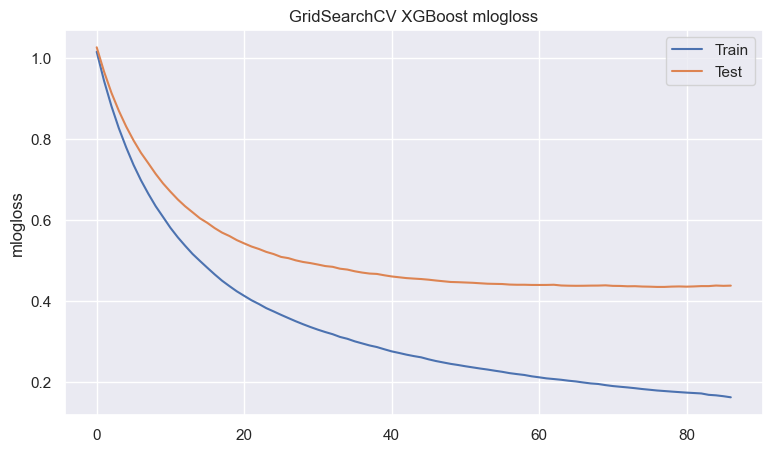

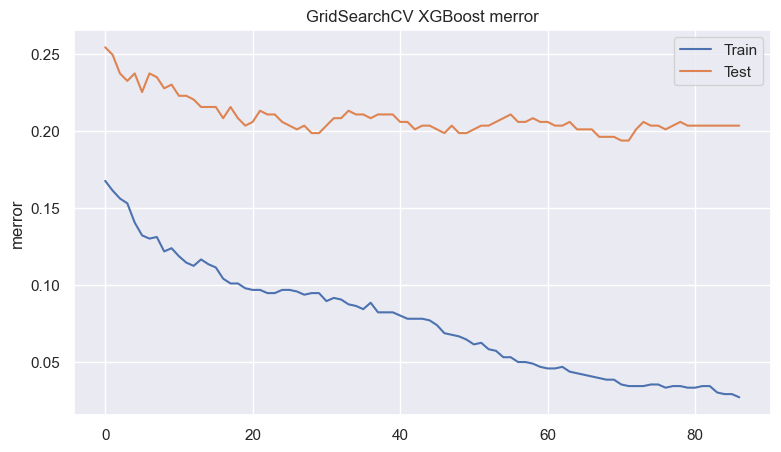


--------------- Classification Report ---------------

Accuracy of XGBoost classifier on train set: 0.967
Accuracy of XGBoost classifier on test set: 0.799
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       195
           1       0.82      0.80      0.81       218

    accuracy                           0.80       413
   macro avg       0.80      0.80      0.80       413
weighted avg       0.80      0.80      0.80       413



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [119]:
xgbst(0.3)

#### Split Size 0.25

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.25 ========================================


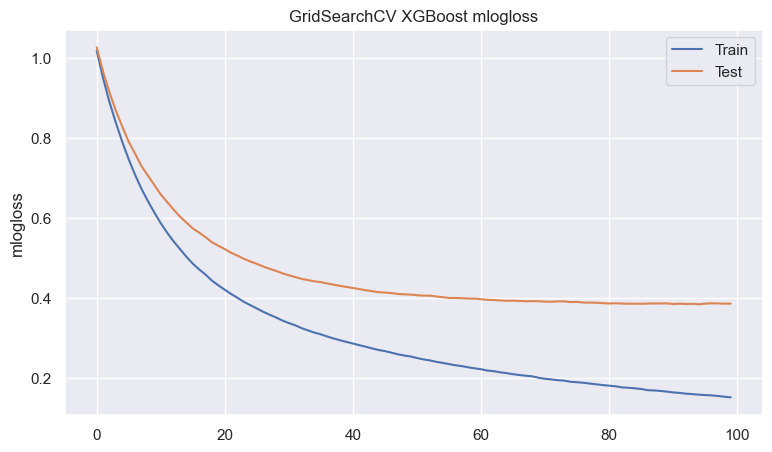

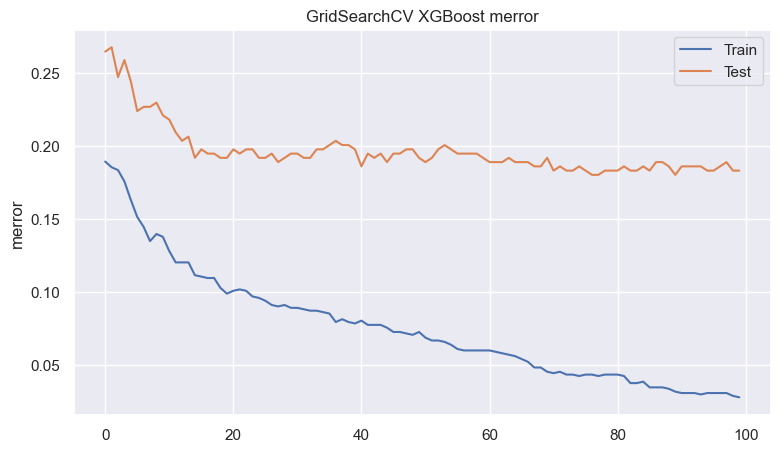


--------------- Classification Report ---------------

Accuracy of XGBoost classifier on train set: 0.969
Accuracy of XGBoost classifier on test set: 0.817
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       161
           1       0.84      0.80      0.82       183

    accuracy                           0.82       344
   macro avg       0.82      0.82      0.82       344
weighted avg       0.82      0.82      0.82       344



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [120]:
xgbst(0.25)

#### Split Size 0.2

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.2 ========================================


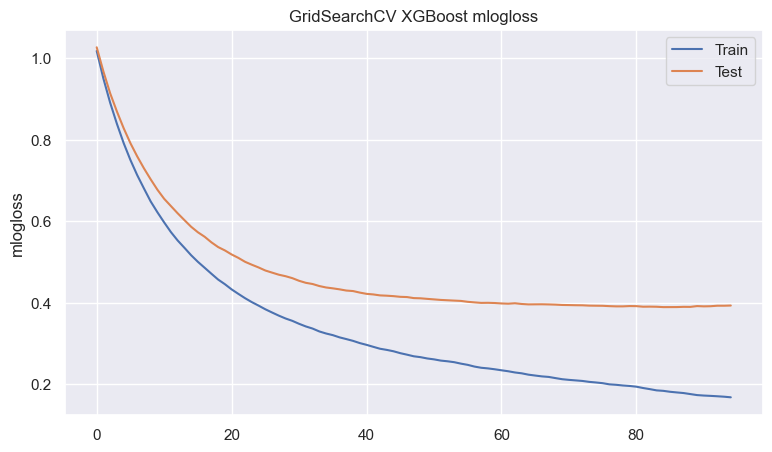

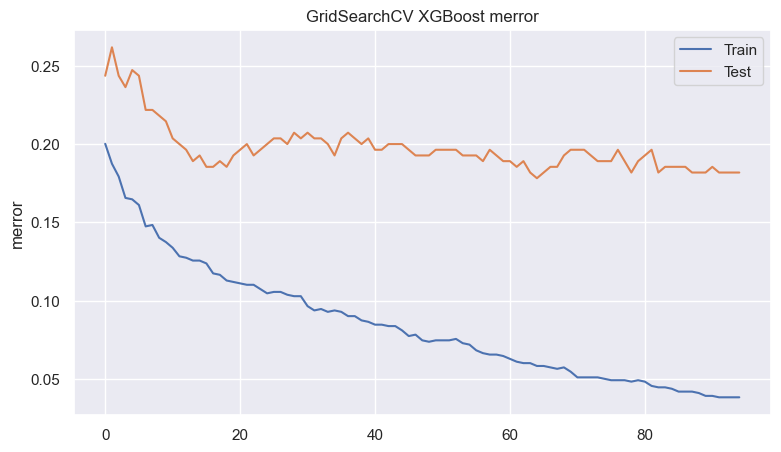


--------------- Classification Report ---------------

Accuracy of XGBoost classifier on train set: 0.956
Accuracy of XGBoost classifier on test set: 0.815
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       129
           1       0.82      0.84      0.83       146

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [121]:
xgbst(0.2)

## Saving Model

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.2 ========================================


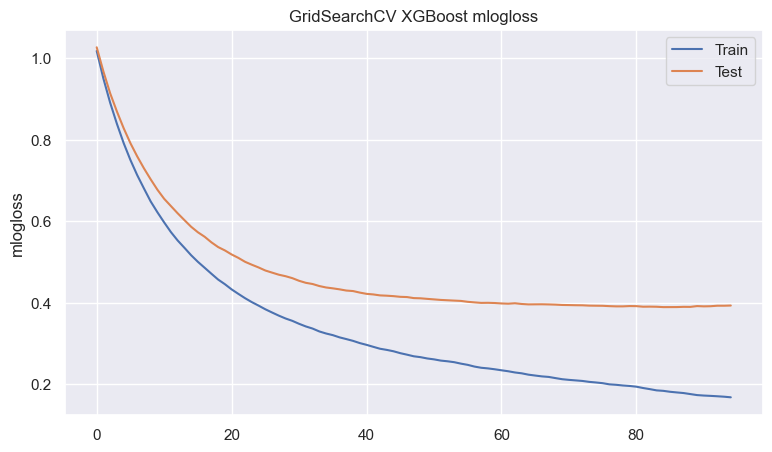

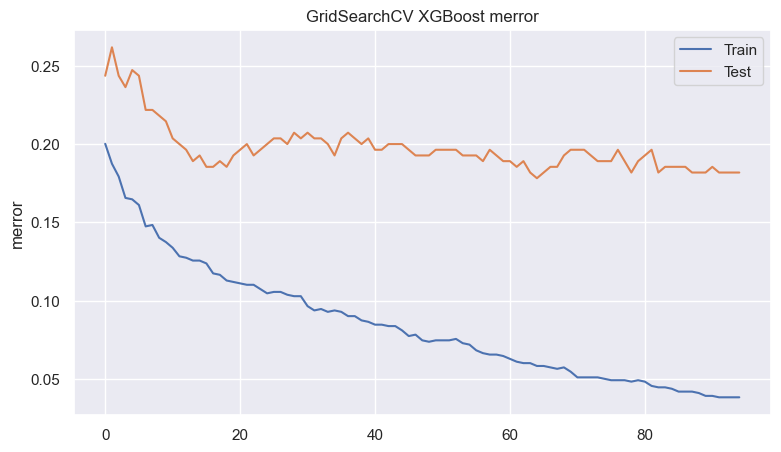


--------------- Classification Report ---------------

Accuracy of XGBoost classifier on train set: 0.956
Accuracy of XGBoost classifier on test set: 0.815
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       129
           1       0.82      0.84      0.83       146

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



In [122]:
model = xgbst(0.2)

In [123]:
type(model)

xgboost.sklearn.XGBClassifier

In [124]:
joblib.dump(model,'final_model.pkl')

['final_model.pkl']